In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from pulearn import (
    MultilayerPerceptron,
    WeightedUnlabelledMultilayerPerceptron,
    UnlabelledExponentialLossMultilayerPerceptron
)

from pulearn.utils import fit_and_plot, synthesize_pu_labels

In [2]:
# Network Parameters
n_input = 2
n_classes = 3
n_samples = 800

(400, 2)
(400, 3)


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

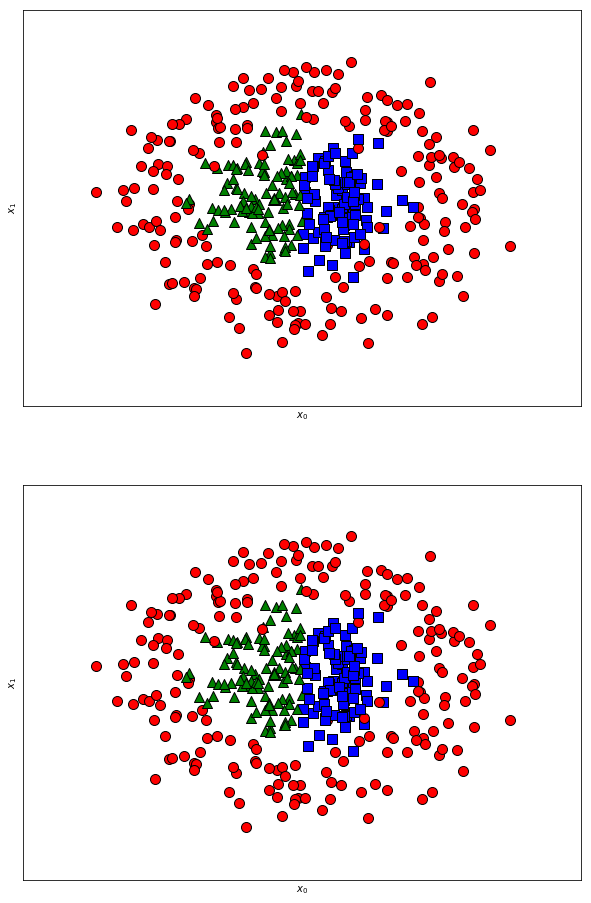

In [3]:
X, y = datasets.make_circles(n_samples=n_samples, noise=0.2, factor=0.3, random_state=0)
second_cls_idx = np.logical_and(X[:, 0] < 0., (1-y)<np.finfo(float).eps)
y[second_cls_idx] = 2
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)
fit_and_plot(X_train, Y_train)

In [5]:
Y_train_pu = synthesize_pu_labels(Y_train, random_state=42)

## Frequency weighted

Using [ 1.          6.97727273  5.90384615]
Epoch: 0001 cost= 2.597638726
Epoch: 0011 cost= 2.112013966
Epoch: 0021 cost= 1.718257099
Epoch: 0031 cost= 1.515763372
Epoch: 0041 cost= 1.370647907
Epoch: 0051 cost= 1.230093688
Epoch: 0061 cost= 1.061125159
Epoch: 0071 cost= 0.978632465
Epoch: 0081 cost= 0.932652995
Epoch: 0091 cost= 0.908724561
Using [ 1.          6.97727273  5.90384615]
Using [ 1.          6.97727273  5.90384615]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

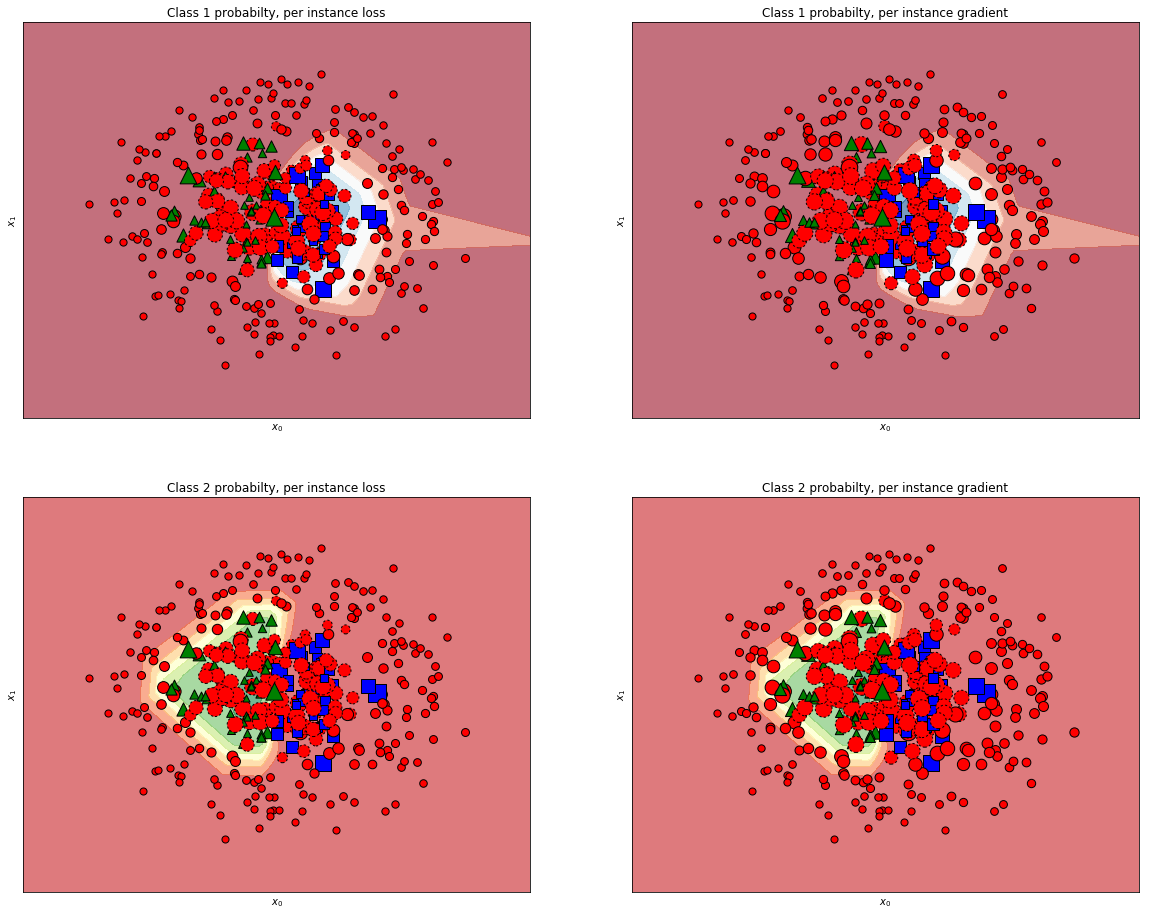

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

## Frequency weighted & unlabelled weighted

Using [ 1.          6.97727273  5.90384615]
Re-weighing to [  1.          13.95454545  11.80769231]
Epoch: 0001 cost= 6.092051864
Epoch: 0011 cost= 4.021826982
Epoch: 0021 cost= 3.416674256
Epoch: 0031 cost= 2.456180394
Epoch: 0041 cost= 1.840134382
Epoch: 0051 cost= 1.558644861
Epoch: 0061 cost= 1.408776850
Epoch: 0071 cost= 1.328164428
Epoch: 0081 cost= 1.278186679
Epoch: 0091 cost= 1.247361511
Using [ 1.          6.97727273  5.90384615]
Re-weighing to [  1.          13.95454545  11.80769231]
Using [ 1.          6.97727273  5.90384615]
Re-weighing to [  1.          13.95454545  11.80769231]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

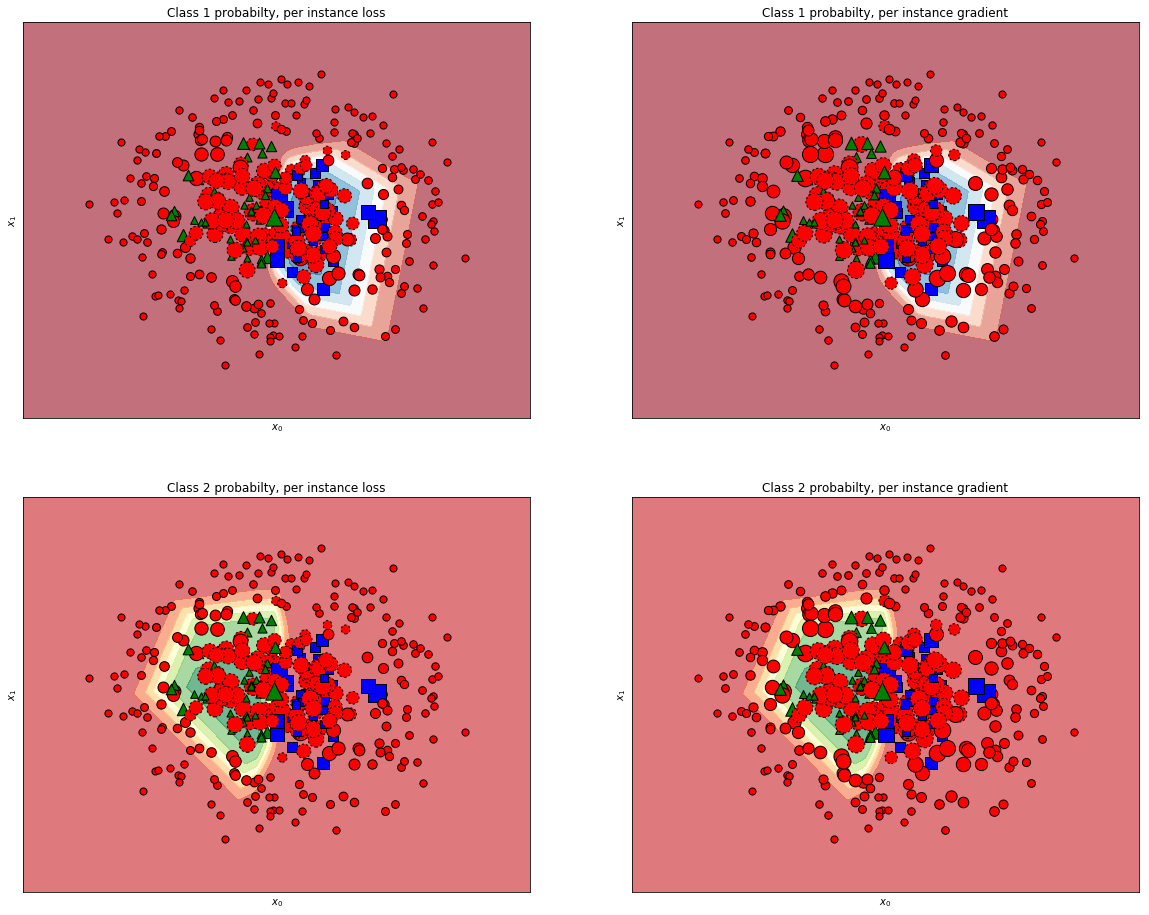

In [10]:
mp = WeightedUnlabelledMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=100,
                          class_weight="balanced",
                          unlabelled_weight={0:0.5, 1:1, 2:1},
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), mp, marker_size=["loss", "gradient"], Y_true=Y_train)

Using [ 1.  1.  1.]
Epoch: 0001 cost= 1.185436398
Epoch: 0011 cost= 0.642958596
Epoch: 0021 cost= 0.609265596
Epoch: 0031 cost= 0.579553321
Epoch: 0041 cost= 0.546802014
Epoch: 0051 cost= 0.507491924
Epoch: 0061 cost= 0.473666169
Epoch: 0071 cost= 0.449626282
Epoch: 0081 cost= 0.426162362
Epoch: 0091 cost= 0.405485705
Epoch: 0101 cost= 0.386151426
Epoch: 0111 cost= 0.370514870
Epoch: 0121 cost= 0.359357014
Epoch: 0131 cost= 0.349000193
Epoch: 0141 cost= 0.340810612
Epoch: 0151 cost= 0.332984120
Epoch: 0161 cost= 0.327634156
Epoch: 0171 cost= 0.323182084
Epoch: 0181 cost= 0.320346475
Epoch: 0191 cost= 0.317397226
Using [ 1.  1.  1.]
Using [ 1.  1.  1.]


<module 'matplotlib.pyplot' from '/home/jihong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

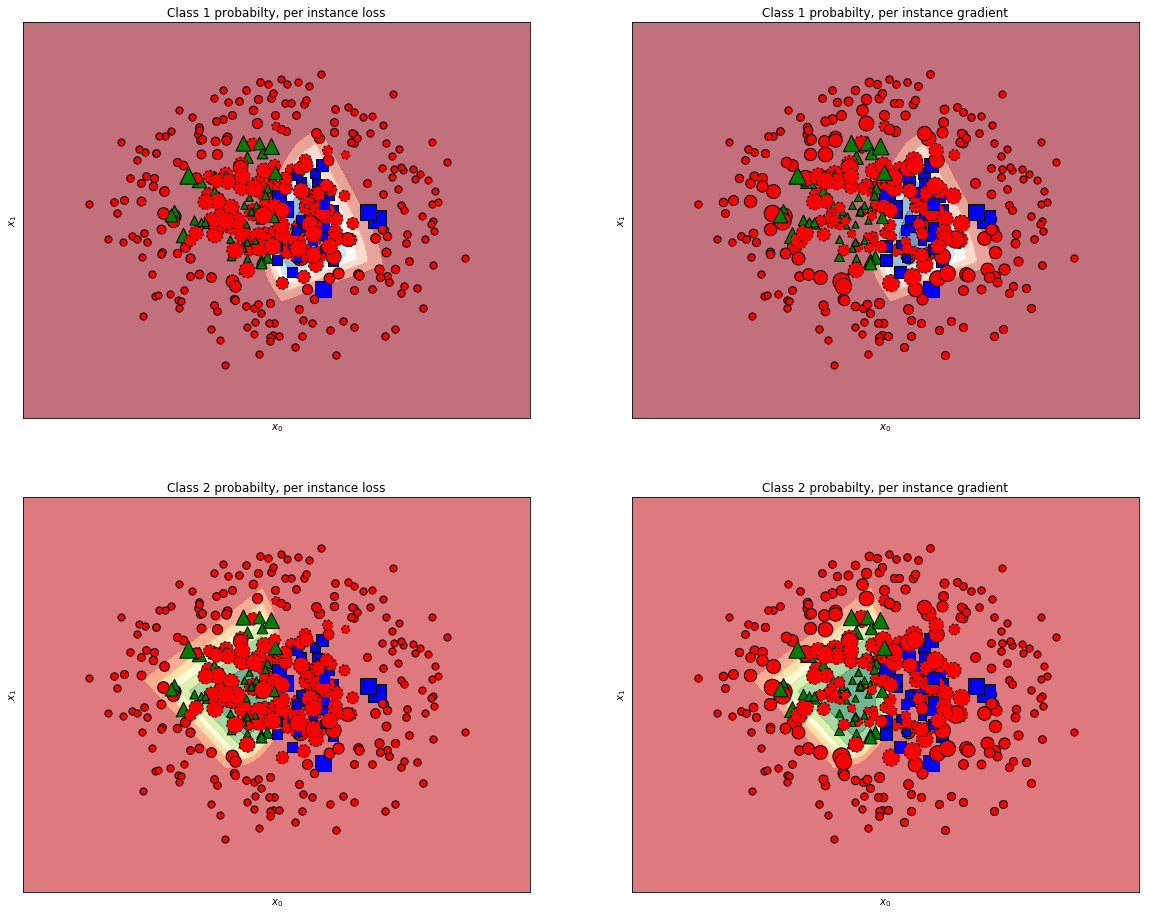

In [13]:
uelmp = UnlabelledExponentialLossMultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          alpha=0,
                          epochs=200,
                          class_weight=None,
                          verbose=True)
fit_and_plot(X_train, Y_train_pu.get(0.5), uelmp, marker_size=["loss", "gradient"], Y_true=Y_train)